In [33]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [34]:
df = pd.read_csv('diabetes.csv')

In [35]:
task_data = df.head(680)

In [36]:
len(task_data[task_data['Outcome'] == 0])

446

In [37]:
train = task_data.head(int(len(task_data)*0.8))
test = task_data.tail(int(len(task_data)*0.2))

In [38]:
features = list(train.columns[:8])
x = train[features]
y = train['Outcome']

In [39]:
tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_leaf_nodes=15, #максимальное число листьев
                              random_state=2020)
clf=tree.fit(x, y)

In [40]:
clf.tree_.max_depth

6

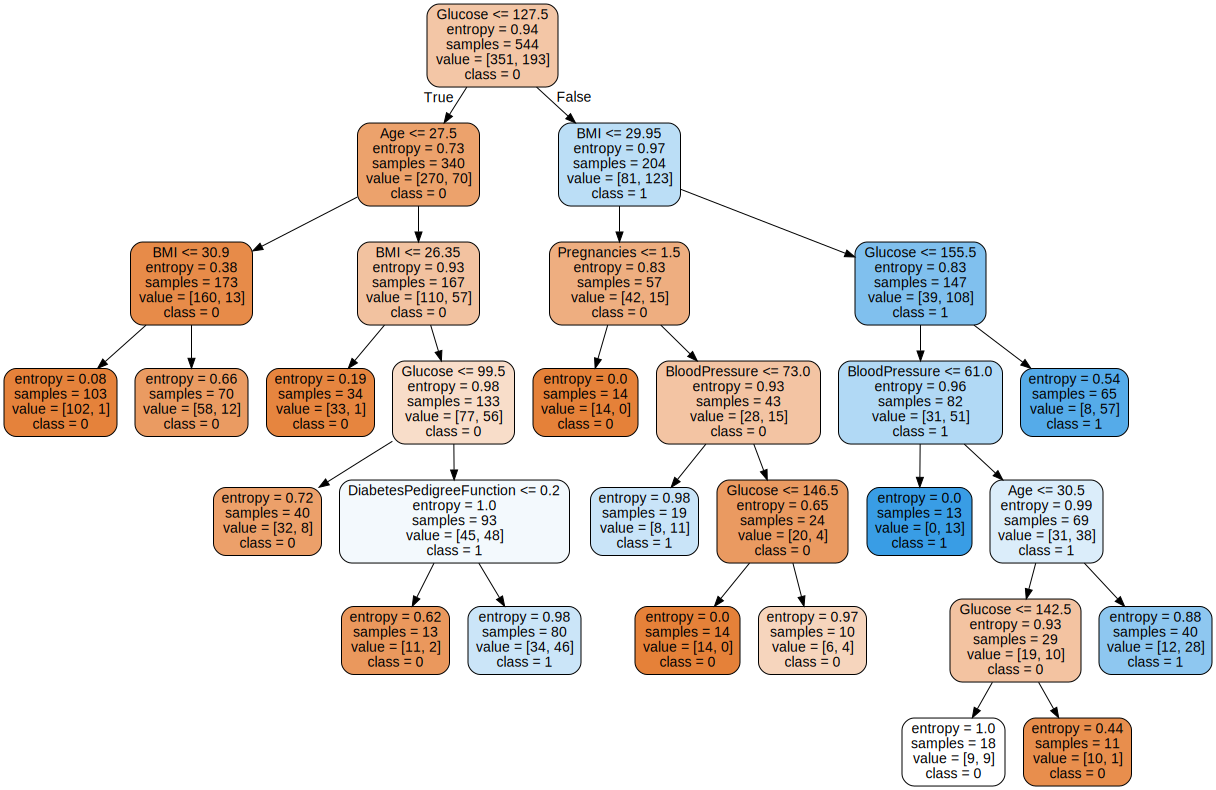

In [41]:
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [42]:
features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)
accuracy_score(y_true, y_pred)

0.7941176470588235

In [19]:
f1_score(y_true, y_pred, average='macro')

0.7612390350877194

In [21]:
df.loc[708, features]

Pregnancies                   9.000
Glucose                     164.000
BloodPressure                78.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          32.800
DiabetesPedigreeFunction      0.148
Age                          45.000
Name: 708, dtype: float64

In [22]:
clf.predict([df.loc[737, features].tolist()])[0]

0

In [23]:
clf.predict([df.loc[740, features].tolist()])[0]

1

In [24]:
clf.predict([df.loc[763, features].tolist()])[0]

0

In [25]:
clf.predict([df.loc[702, features].tolist()])[0]

1